In [2]:
import pandas as pd
from pandas import DataFrame
import os.path
import matplotlib.pyplot as plt

In [3]:
def download_file(file_name: str): # wa_ev_registrations_public
    if not os.path.exists('data/{}.csv'.format(file_name)):
        import requests
        url = "https://www.atlasevhub.com/public/dmv/{}.csv".format(file_name)
        file = requests.get(url)
        print(file)
        with open('data/{}.csv'.format(file_name), 'wb') as text:
            text.write(file.content)

#download_file('wa_ev_registrations_public')

Hypothesis 2: What is the difference in sales between different brands of new energy vehicles？

New York State

In [4]:
download_file('ny_ev_registrations_public')

<Response [200]>


In [5]:
newyork_data = pd.read_csv('data/ny_ev_registrations_public.csv')

In [6]:
len(newyork_data)

2910288

In [7]:
newyork_data.head(5)

,ZIP Code,Registration Valid Date,VIN Prefix,DMV ID,DMV Snapshot,VIN Model Year,Registration Expiration Date,State,Vehicle Name,Technology
0,11797,2020-02-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-12-19,NY,Tesla Model X,BEV
1,11215,2018-09-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-20,NY,Tesla Model X,BEV
2,11040,2018-12-03,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2021-01-08,NY,Tesla Model X,BEV
3,11215,2018-09-30,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-29,NY,Tesla Model X,BEV
4,11976,2018-09-11,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-09,NY,Tesla Model X,BEV


In [8]:
newyork_data_df = DataFrame(newyork_data)

In [9]:
newyork_data_df.insert(newyork_data_df.shape[1], 'Date',
                        newyork_data_df['Registration Valid Date'].str.split('-', expand=True)[0])
newyork_data_df.insert(newyork_data_df.shape[-1], 'Make',
                        newyork_data_df['Vehicle Name'].str.split(' ', expand=True)[0])

In [10]:
newyork_data_df.head(5)

,ZIP Code,Registration Valid Date,VIN Prefix,DMV ID,DMV Snapshot,VIN Model Year,Registration Expiration Date,State,Vehicle Name,Technology,Date,Make
0,11797,2020-02-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-12-19,NY,Tesla Model X,BEV,2020,Tesla
1,11215,2018-09-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-20,NY,Tesla Model X,BEV,2018,Tesla
2,11040,2018-12-03,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2021-01-08,NY,Tesla Model X,BEV,2018,Tesla
3,11215,2018-09-30,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-29,NY,Tesla Model X,BEV,2018,Tesla
4,11976,2018-09-11,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-09,NY,Tesla Model X,BEV,2018,Tesla


In [11]:
newyork_data_df[['Date']] = newyork_data_df[['Date']].astype(int)

In [12]:
newyork_data_df = newyork_data_df[newyork_data_df['Date'] >= 2020]

In [13]:
newyork_data_df_clean = newyork_data_df[['Date','Make']]

In [14]:
newyork_data_df_count_years = newyork_data_df_clean[pd.notnull(newyork_data_df_clean['Date'])].groupby(by='Date').count()
newyork_data_df_count_years.columns = ['Count']
newyork_data_df_count_years

,Count
Date,
2020,695614
2021,576660
2022,29132


In [15]:
ny_df_h2_count = newyork_data_df_clean[pd.notnull(newyork_data_df_clean['Make'])].groupby(by='Make').count()
ny_df_h2_count.columns = ['Brand Count']

In [16]:
ny_df_h2_count.head(10)

,Brand Count
Make,
Audi,16239
Azure,154
BMW,58396
BYD,9
Bentley,106
Blue,108
Cadillac,1336
Chanje,19
Chevrolet,99612


In [17]:
def my_autopct(pct):
    return ('%.1f%%' % pct) if pct > 1 else ''

In [18]:
# ny_df_h2_count.plot.pie(subplots=True, figsize=(20, 20), autopct=my_autopct,
#                                  title='NY' + 'Pie Chart of Different Brands of Car',labeldistance=0.9)
# ny_df_h2_count.plot.bar(figsize=(20, 10),
#                                  title='NY' + 'Bar Chart of Different Brands of Car')

In [19]:
def h2_EV_analyze(data_file, state_name):
    clean_file = data_file[['Date', 'Make']]
    clean_file_count = clean_file[pd.notnull(clean_file['Make'])].groupby(by='Make').count()
    clean_file_count.columns = ['Brand Count']
    print(clean_file_count)
    clean_file_count.plot.pie(subplots=True, figsize=(20, 20), autopct=my_autopct,
                                 title=state_name + ' Pie Chart of Different Brands of Car',labeldistance=0.9)
    clean_file_count.plot.bar(figsize=(20, 10),
                                 title=state_name + ' Bar Chart of Different Brands of Car')


               Brand Count
Make                      
Audi                 16239
Azure                  154
BMW                  58396
BYD                      9
Bentley                106
Blue                   108
Cadillac              1336
Chanje                  19
Chevrolet            99612
Chrysler             16020
Coda                     5
E-Ride                  74
Ferrari                 85
Fiat                  1019
Fisker                 366
Ford                 86004
GEM                   6358
Honda                35323
Hyundai              76490
International           18
Jaguar                2399
Jeep                 12809
Karma                  368
Kia                  19050
Land                  1517
Lincoln               2598
Lion                   135
Lucid                   22
Mclaren                 96
Mercedes              7389
Mini                  3678
Mitsubishi           13878
New                    194
Nissan               29153
Orange                  46
P

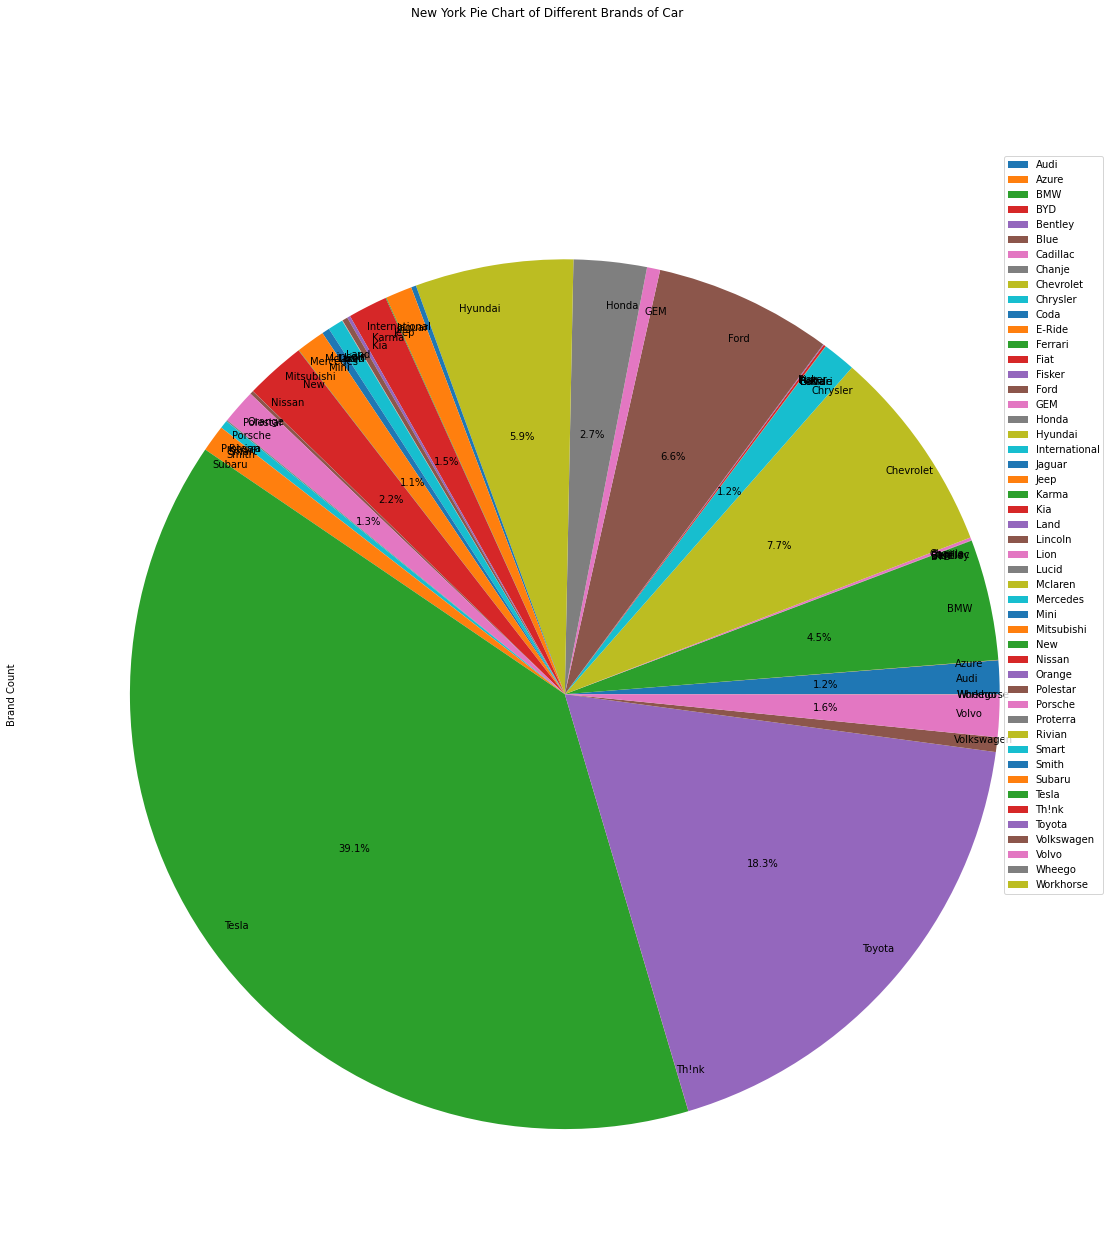

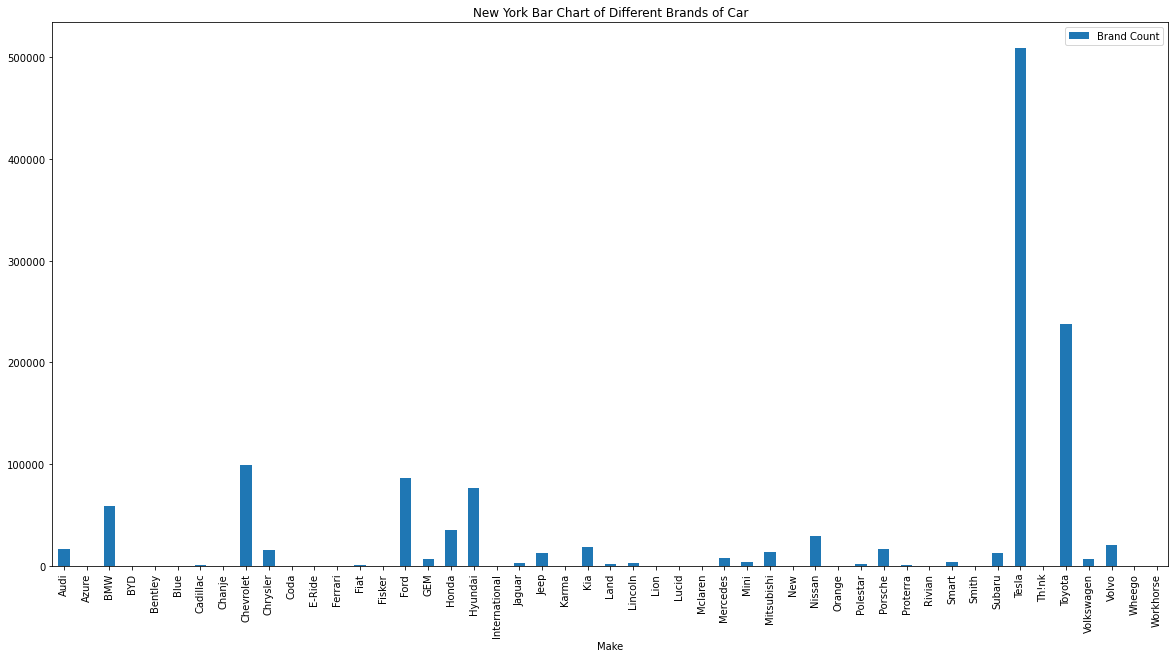

In [20]:
h2_EV_analyze(newyork_data_df, 'New York')

Texas State

In [27]:
download_file('tx_ev_registrations_public')

<Response [200]>


In [28]:
texas_data = pd.read_csv('data/tx_ev_registrations_public.csv')

In [29]:
len(texas_data)

1033202

In [30]:
texas_data.head(5)

,DMV ID,DMV Snapshot (Date),ZIP Code,Vehicle Name,Registration Valid Date,Registration Expiration Date
0,12,Registration Data from DFW Clean Cities (4/1/2...,75604,Tesla Model 3,2/11/2022,NaN
1,12,Registration Data from DFW Clean Cities (4/1/2...,78152,Tesla Model 3,1/7/2022,NaN
2,12,Registration Data from DFW Clean Cities (4/1/2...,77459,Tesla Model 3,3/7/2022,NaN
3,12,Registration Data from DFW Clean Cities (4/1/2...,78727,Tesla Model 3,7/16/2021,NaN
4,12,Registration Data from DFW Clean Cities (4/1/2...,77494,Tesla Model 3,12/1/2021,NaN


In [31]:
texas_data_df = DataFrame(texas_data)

In [32]:
texas_data_df.insert(texas_data_df.shape[1], 'Date',
                       texas_data_df['Registration Valid Date'].str.split('/', expand=True)[2])
texas_data_df.insert(texas_data_df.shape[-1], 'Make',
                       texas_data_df['Vehicle Name'].str.split(' ', expand=True)[0])

In [33]:
texas_data_df.head(5)

,DMV ID,DMV Snapshot (Date),ZIP Code,Vehicle Name,Registration Valid Date,Registration Expiration Date,Date,Make
0,12,Registration Data from DFW Clean Cities (4/1/2...,75604,Tesla Model 3,2/11/2022,NaN,2022,Tesla
1,12,Registration Data from DFW Clean Cities (4/1/2...,78152,Tesla Model 3,1/7/2022,NaN,2022,Tesla
2,12,Registration Data from DFW Clean Cities (4/1/2...,77459,Tesla Model 3,3/7/2022,NaN,2022,Tesla
3,12,Registration Data from DFW Clean Cities (4/1/2...,78727,Tesla Model 3,7/16/2021,NaN,2021,Tesla
4,12,Registration Data from DFW Clean Cities (4/1/2...,77494,Tesla Model 3,12/1/2021,NaN,2021,Tesla


In [34]:
texas_data_df_clean = texas_data_df[['Date', 'Make']]

In [35]:
texas_data_df_count_years = texas_data_df_clean[pd.notnull(texas_data_df_clean['Date'])].groupby(by='Date').count()
texas_data_df_count_years.columns = ['Count']
texas_data_df_count_years

,Count
Date,
2020,156328
2021,814935
2022,61939


In [36]:
texas_df_h2_count = texas_data_df_clean[pd.notnull(texas_data_df_clean['Make'])].groupby(by='Make').count()
texas_df_h2_count.columns = ['Brand Count']

In [37]:
texas_df_h2_count.head(10)

,Brand Count
Make,
Audi,19767
Azure,14
BMW,64030
Bentley,48
Cadillac,3163
Chevrolet,88997
Chrysler,24614
Coda,10
E-Ride,69


            Brand Count
Make                   
Audi              19767
Azure                14
BMW               64030
Bentley              48
Cadillac           3163
Chevrolet         88997
Chrysler          24614
Coda                 10
E-Ride               69
Ferrari             173
Fiat               6439
Fisker              610
Ford              47869
GEM                1395
Honda             10323
Hummer                1
Hyundai            2459
Jaguar             2000
Jeep              13000
Karma               206
Kia                9914
Land                803
Lincoln            3931
Lucid                19
Mclaren              52
Mercedes           4079
Miles                26
Mini               3324
Mitsubishi         4499
New                 102
Nissan            45791
Polestar           2962
Porsche           21208
Rivian               25
Smart              2232
Subaru              297
Tesla            592750
Toyota            30130
Volkswagen         8837
Volvo           

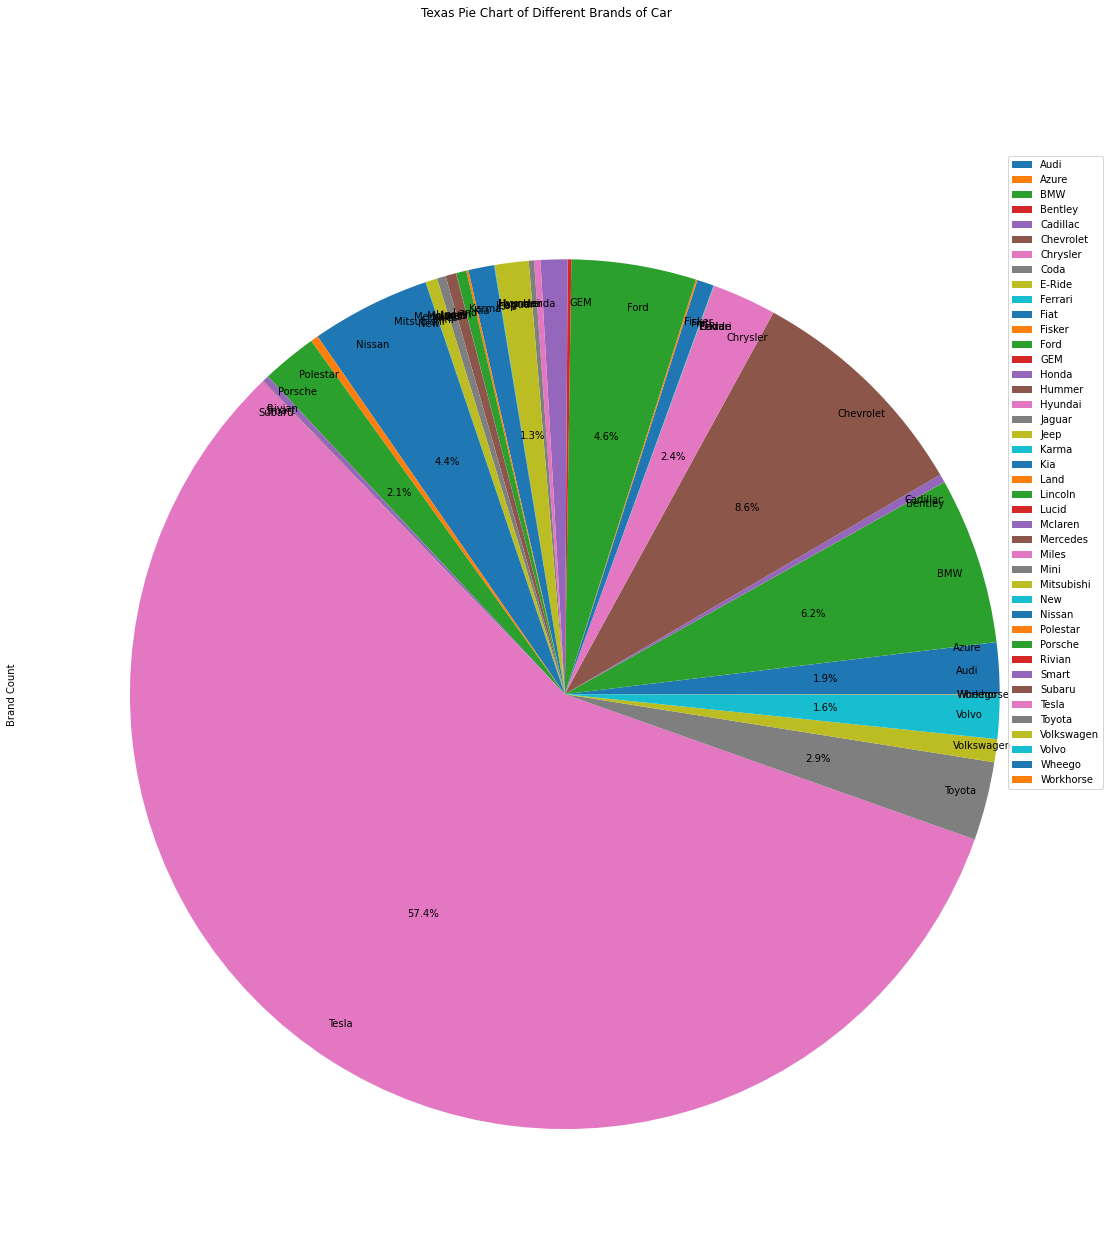

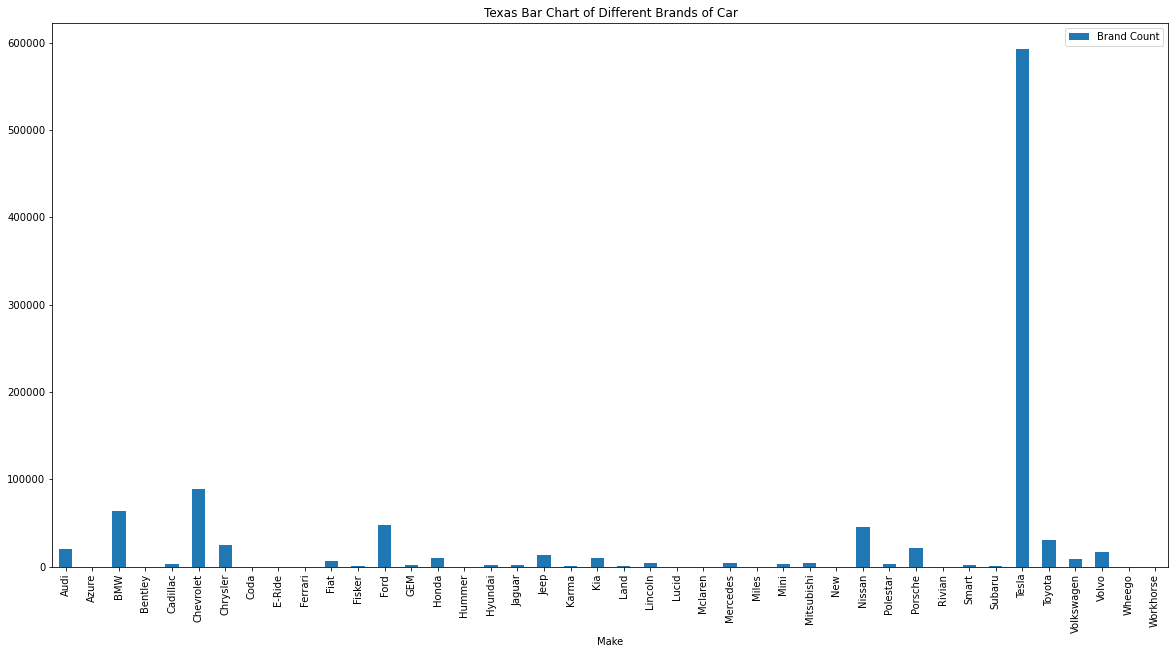

In [38]:
h2_EV_analyze(texas_data_df, 'Texas')

Washington State

In [39]:
download_file('wa_ev_registrations_public')

In [40]:
washington_data = pd.read_csv('data/wa_ev_registrations_public.csv',low_memory = False)

In [41]:
len(washington_data)

2364838

In [42]:
washington_data.head(5)

,Vehicle ID,ZIP Code,Registration Valid Date,VIN Prefix,VIN Model Year,DMV ID,DMV ID Complete,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name,Technology
0,WA-047-134958694,98012,2022-03-16,5YJ3E1EC,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model 3,BEV
1,WA-047-276610085,98664,2022-03-16,JA4J24A5,J,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Mitsubishi Outlander Plug In,PHEV
2,WA-047-192782285,98020,2022-03-16,7SAYGAEE,N,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV
3,WA-047-179410703,98029,2022-03-16,LPSED3KA,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Polestar 2,BEV
4,WA-047-171474537,98004,2022-03-16,WP0AB2Y1,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Porsche Taycan,BEV


In [43]:
washington_data_df = DataFrame(washington_data)

In [44]:
washington_data_df.insert(washington_data_df.shape[1], 'Date',
                     washington_data_df['Registration Valid Date'].str.split('-', expand=True)[0])
washington_data_df.insert(washington_data_df.shape[-1], 'Make',
                     washington_data_df['Vehicle Name'].str.split(' ', expand=True)[0])

In [45]:
washington_data_df.head(5)

,Vehicle ID,ZIP Code,Registration Valid Date,VIN Prefix,VIN Model Year,DMV ID,DMV ID Complete,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name,Technology,Date,Make
0,WA-047-134958694,98012,2022-03-16,5YJ3E1EC,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model 3,BEV,2022,Tesla
1,WA-047-276610085,98664,2022-03-16,JA4J24A5,J,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Mitsubishi Outlander Plug In,PHEV,2022,Mitsubishi
2,WA-047-192782285,98020,2022-03-16,7SAYGAEE,N,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV,2022,Tesla
3,WA-047-179410703,98029,2022-03-16,LPSED3KA,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Polestar 2,BEV,2022,Polestar
4,WA-047-171474537,98004,2022-03-16,WP0AB2Y1,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Porsche Taycan,BEV,2022,Porsche


In [46]:
washington_data_df[['Date']] = washington_data_df[['Date']].astype(int)
washington_data_df = washington_data_df[washington_data_df['Date'] >= 2020]

In [47]:
washington_data_df_clean = washington_data_df[['Date', 'Make']]

In [48]:
washington_data_df_count_years = washington_data_df_clean[pd.notnull(washington_data_df_clean['Date'])].groupby(by='Date').count()
washington_data_df_count_years.columns = ['Count']

In [49]:
washington_data_df_count_years

,Count
Date,
2020,683319
2021,881159
2022,258427


            Brand Count
Make                   
Audi              33194
Azure               230
BMW               80865
Bentley              27
Cadillac           2519
Chevrolet        232100
Chrysler          27628
Fiat              19890
Fisker              431
Ford             105005
Honda             18321
Hyundai           10630
Jaguar             4466
Jeep               3743
Kia               54565
Land                726
Lincoln             753
Lucid                 2
Mercedes           7136
Mini               6554
Mitsubishi        12234
Nissan           309740
Polestar            955
Porsche           10855
Rivian               62
Smart              6837
Subaru             1150
Tesla            742490
Th!nk                63
Toyota            81653
Volkswagen        30383
Volvo             17639
Wheego               59


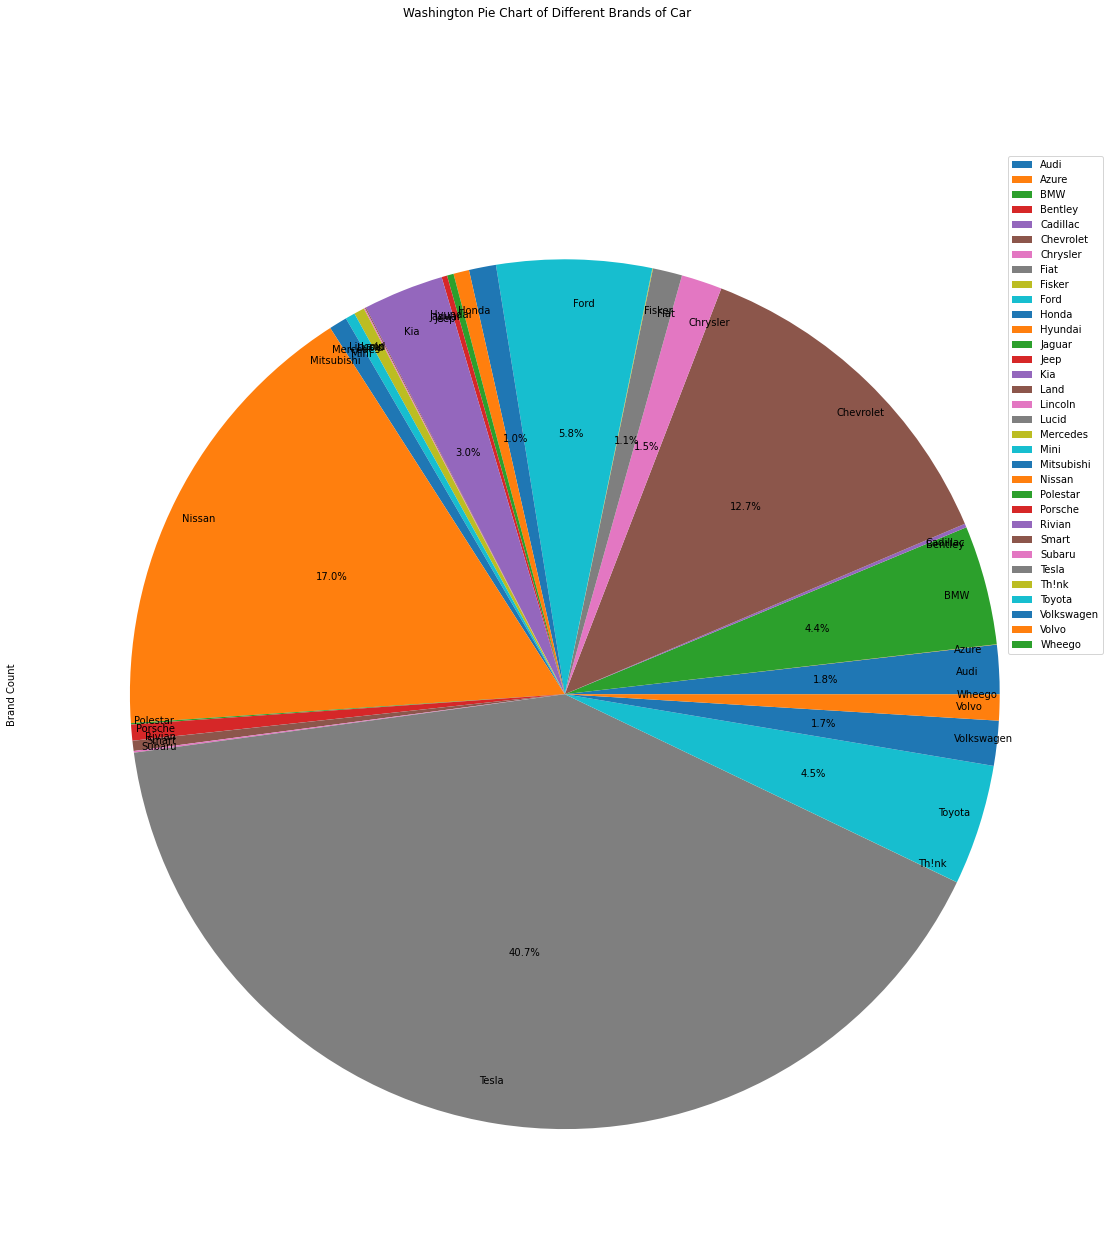

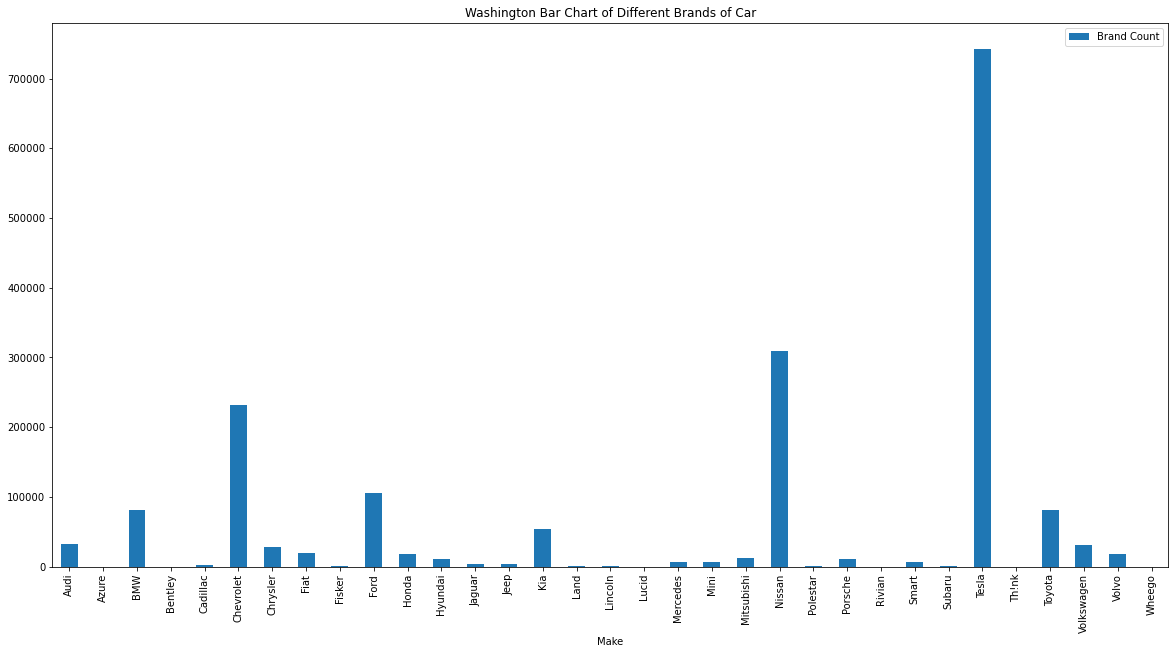

In [50]:
h2_EV_analyze(washington_data_df, 'Washington')